In [1]:
import os
import sys
import pdb
import numpy as np
import scipy.interpolate
import scipy.io
import matlab.engine
import importlib
import soundfile as sf
import multiprocessing
import functools

import matplotlib.pyplot as plt

import port
importlib.reload(port)

import room_simulator
importlib.reload(room_simulator)

sys.path.append('/om2/user/msaddler/python-packages/msutil')
import util_figures
import util_stimuli
import util_misc


In [2]:
eng = matlab.engine.start_matlab();


In [3]:
fn = '/scratch2/weka/mcdermott/francl/Room_Simulator_20181115_Rebuild/Expanded_HRIRdist140-5deg_elev_az_room3x3y4z_materials23wall23floor26ciel/15elev_35az_1.40x1.60y2.00z_l.wav'
room_materials = [23, 23, 23, 23, 23, 26]
room_dim_xyz = [3, 3, 4]
head_pos_xyz = [1.4, 1.6, 2.0]
head_azim = 0
src_azim = 35
src_elev = 15
src_dist = 1.4

# fn = '/scratch2/weka/mcdermott/francl/Room_Simulator_20181115_Rebuild/Expanded_HRIRdist140-5deg_elev_az_room5x4y2z_materials1wall15floor16ciel/0elev_45az_3.60x1.40y2.00z_l.wav'
# room_materials = [1, 1, 1, 1, 15, 16]
# room_dim_xyz = [5, 4, 2]
# head_pos_xyz = [3.6, 1.4, 2.0]
# head_azim = 0
# src_azim = 45
# src_elev = 0
# src_dist = 1.4

buffer = 0
sr = 44100
dur = 0.5
use_hrtf_symmetry = True
use_jitter = False
incorporate_lead_zeros = False

print(fn)
y_l, hrtf_sr = sf.read(fn)
y_r, hrtf_sr = sf.read(fn.replace('_l.wav', '_r.wav'))
brir_francl = np.stack([y_l, y_r], axis=1)
print(brir_francl.shape, hrtf_sr, sr)


/scratch2/weka/mcdermott/francl/Room_Simulator_20181115_Rebuild/Expanded_HRIRdist140-5deg_elev_az_room3x3y4z_materials23wall23floor26ciel/15elev_35az_1.40x1.60y2.00z_l.wav
(22050, 2) 44100 44100


In [4]:
importlib.reload(room_simulator)

brir_matlab = room_simulator.get_brir(
    room_materials=room_materials,
    room_dim_xyz=room_dim_xyz,
    head_pos_xyz=head_pos_xyz,
    head_azim=head_azim,
    src_azim=src_azim,
    src_elev=src_elev,
    src_dist=src_dist,
    buffer=buffer,
    sr=sr,
    dur=dur,
    kwargs_room_impulse_hrtf={},
    incorporate_lead_zeros=incorporate_lead_zeros,
    verbose=True,
    eng=eng)


[room simulator] head_pos: [1.4, 1.6, 2.0], src_pos: [2.5077361613307136, 2.375645210511253, 2.362346663143529], room_dim: [3, 3, 4]
[room simulator] time elapsed: 139.62030243873596 seconds


In [5]:
importlib.reload(port)

brir_msaddler = port.get_brir(
    room_materials=room_materials,
    room_dim_xyz=room_dim_xyz,
    head_pos_xyz=head_pos_xyz,
    head_azim=head_azim,
    src_azim=src_azim,
    src_elev=src_elev,
    src_dist=src_dist,
    buffer=buffer,
    sr=sr,
    dur=dur,
    use_jitter=use_jitter,
    incorporate_lead_zeros=incorporate_lead_zeros)


[get_brir] head_pos: [1.4, 1.6, 2.0], src_pos: [2.5077361613307136, 2.375645210511253, 2.362346663143529], room_dim: [3, 3, 4]
Loaded KEMAR `hrtf_firs` (Gardner & Martin, 1995): (368, 128, 2)
Loaded KEMAR `hrtf_locs` (Gardner & Martin, 1995): (368, 3)
[get_brir] time elapsed: 32.80414867401123 seconds


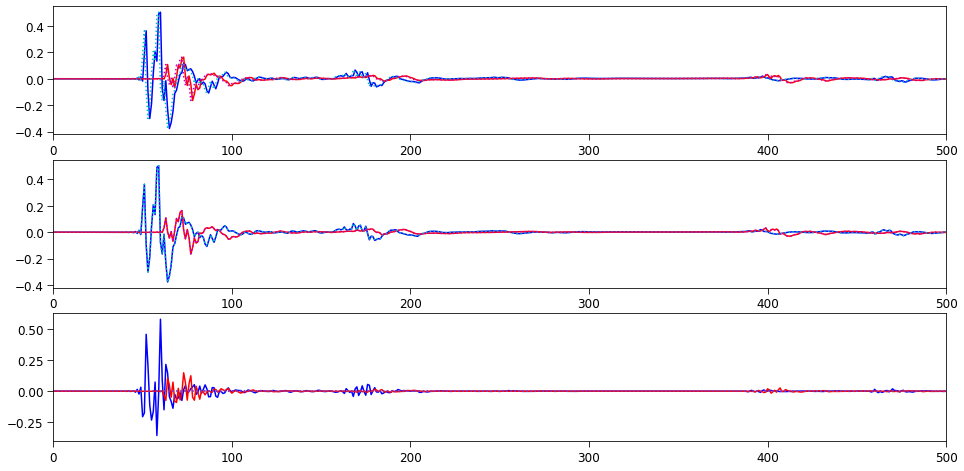

In [7]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=3, ncols=1)
ax[0].plot(brir_msaddler[:, 0], 'b')
ax[0].plot(brir_msaddler[:, 1], 'r')
ax[0].plot(brir_francl[:, 0], 'c', ls=':')
ax[0].plot(brir_francl[:, 1], 'm', ls=':')

ax[1].plot(brir_matlab[:, 0], 'b')
ax[1].plot(brir_matlab[:, 1], 'r')
ax[1].plot(brir_francl[:, 0], 'c', ls=':')
ax[1].plot(brir_francl[:, 1], 'm', ls=':')

ax[2].plot(brir_msaddler[:, 0] - brir_francl[:, 0], 'b')
ax[2].plot(brir_msaddler[:, 1] - brir_francl[:, 1], 'r')
ax[2].plot(brir_matlab[:, 0] - brir_francl[:, 0], 'c', ls=':')
ax[2].plot(brir_matlab[:, 1] - brir_francl[:, 1], 'm', ls=':')

for ax_ in ax:
    util_figures.format_axes(
        ax_,
        xlimits=[0, 500]
    )
plt.show()


In [8]:
room_materials = [1, 1, 1, 1, 15, 16]
room_dim_xyz = [15, 14, 2]
head_pos_xyz = [3.6, 1.4, 2.0]
head_azim = 135
src_azim = 45
src_elev = 0
src_dist = 1.4

bufferbuffer_pos = 0
sr = 44100
dur = 0.5
use_hrtf_symmetry = True
use_jitter = False
incorporate_lead_zeros = False

importlib.reload(port)

brir_msaddler = port.get_brir(
    room_materials=room_materials,
    room_dim_xyz=room_dim_xyz,
    head_pos_xyz=head_pos_xyz,
    head_azim=head_azim,
    src_azim=src_azim,
    src_elev=src_elev,
    src_dist=src_dist,
    sr=sr,
    dur=dur,
    use_hrtf_symmetry=use_hrtf_symmetry,
    use_jitter=use_jitter,
    incorporate_lead_zeros=incorporate_lead_zeros)


[get_brir] head_pos: [3.6, 1.4, 2.0], src_pos: [2.2, 1.4000000000000001, 2.0], room_dim: [15, 14, 2]
Loaded KEMAR `hrtf_firs` (Gardner & Martin, 1995): (368, 128, 2)
Loaded KEMAR `hrtf_locs` (Gardner & Martin, 1995): (368, 3)
[get_brir] time elapsed: 3.9542601108551025 seconds


In [9]:
importlib.reload(room_simulator)

brir_matlab = room_simulator.get_brir(
    room_materials=room_materials,
    room_dim_xyz=room_dim_xyz,
    head_pos_xyz=head_pos_xyz,
    head_azim=head_azim,
    src_azim=src_azim,
    src_elev=src_elev,
    src_dist=src_dist,
    buffer=buffer,
    sr=sr,
    dur=dur,
    kwargs_room_impulse_hrtf={'jitter':use_jitter, 'meas_sym': use_hrtf_symmetry},
    incorporate_lead_zeros=incorporate_lead_zeros,
    verbose=True,
    eng=eng)


[room simulator] head_pos: [3.6, 1.4, 2.0], src_pos: [2.2, 1.4000000000000001, 2.0], room_dim: [15, 14, 2]
[room simulator] time elapsed: 5.43097996711731 seconds


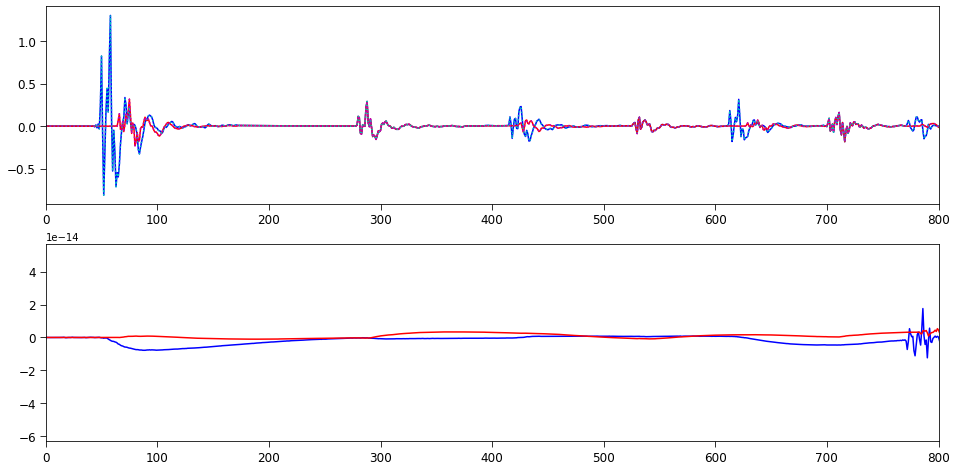

In [10]:
fig, ax = plt.subplots(figsize=(16, 8), nrows=2, ncols=1)

offset_brir_msaddler = brir_msaddler[1:]
offset_brir_matlab = brir_matlab[:-1]

ax[0].plot(offset_brir_msaddler[:, 0], 'b')
ax[0].plot(offset_brir_msaddler[:, 1], 'r')
ax[0].plot(offset_brir_matlab[:, 0], 'c', ls=':')
ax[0].plot(offset_brir_matlab[:, 1], 'm', ls=':')

ax[1].plot(offset_brir_msaddler[:, 0] - offset_brir_matlab[:, 0], 'b')
ax[1].plot(offset_brir_msaddler[:, 1] - offset_brir_matlab[:, 1], 'r')

for ax_ in ax:
    util_figures.format_axes(
        ax_,
        xlimits=[0, 800],
#         ylimits=[-0.01, 0.01]
    )
plt.show()


In [ ]:
import cProfile
import pstats
importlib.reload(port)

func_to_profile = lambda : port.get_brir(
    room_materials=[23, 23, 23, 23, 23, 26],
    room_dim_xyz=[3, 3, 4],
    head_pos_xyz=[1.4, 1.6, 2.0],
    head_azim=0,
    src_azim=35,
    src_elev=15,
    src_dist=1.4,
    sr=44100,
    dur=0.5,
    use_jitter=False,
    use_hrtf_symmetry=True,
    incorporate_lead_zeros=False)

cProfile.run('func_to_profile()', 'profiler_stats')


In [ ]:
p = pstats.Stats('profiler_stats')
p.strip_dirs().sort_stats('cumulative').print_stats()


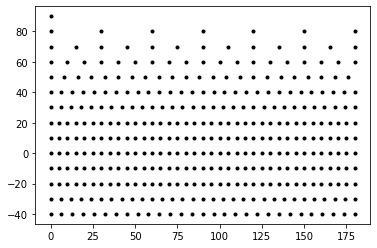

In [11]:
hrtf_locs = scipy.io.loadmat('HRTFs/data_locs.mat')['locs_gardnermartin']
hrtf_locs = np.array(hrtf_locs, dtype=float)
hrtf_locs

fig, ax = plt.subplots()
x = hrtf_locs[:, 1]
y = hrtf_locs[:, 2]
ax.plot(x, y, 'k.')
plt.show()
